In [117]:
import pandas as pd

all_data = pd.read_csv('groceries - groceries.csv')
print(all_data)  #Видно, что датафрейм содержит NaN значения

      Item(s)               Item 1               Item 2            Item 3  \
0           4         citrus fruit  semi-finished bread         margarine   
1           3       tropical fruit               yogurt            coffee   
2           1           whole milk                  NaN               NaN   
3           4            pip fruit               yogurt      cream cheese   
4           4     other vegetables           whole milk    condensed milk   
...       ...                  ...                  ...               ...   
9830       17              sausage              chicken              beef   
9831        1    cooking chocolate                  NaN               NaN   
9832       10              chicken         citrus fruit  other vegetables   
9833        4  semi-finished bread        bottled water              soda   
9834        5              chicken       tropical fruit  other vegetables   

                        Item 4         Item 5          Item 6  \
0         

In [118]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str)] for row in
           np_data]

In [119]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)

print(f'Количество товаров: {len(unique_items)}')
unique_items

Количество товаров: 169


{'Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [120]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

In [121]:
from mlxtend.frequent_patterns import fpgrowth

result = fpgrowth(data, min_support=0.03, use_colnames=True)
print(result)

     support                             itemsets
0   0.082766                       (citrus fruit)
1   0.058566                          (margarine)
2   0.139502                             (yogurt)
3   0.104931                     (tropical fruit)
4   0.058058                             (coffee)
..       ...                                  ...
58  0.033249                 (pastry, whole milk)
59  0.047382  (root vegetables, other vegetables)
60  0.048907        (root vegetables, whole milk)
61  0.030605                (rolls/buns, sausage)
62  0.032232     (whipped/sour cream, whole milk)

[63 rows x 2 columns]


In [122]:
result["itemsets_len"] = result["itemsets"].apply(lambda x: len(x))

length_itemsets = set(result["itemsets_len"])

for length in length_itemsets:
    length_result = result[(result['itemsets_len'] == length)]
    print(
        f'При длине {length} минимальное значение: {min(length_result["support"])}, максимальное значение: {max(length_result["support"])}')

При длине 1 минимальное значение: 0.03040162684290798, максимальное значение: 0.25551601423487547
При длине 2 минимальное значение: 0.030096593797661414, максимальное значение: 0.07483477376715811


In [123]:
from mlxtend.frequent_patterns import fpmax

result_fpmax = fpmax(data, min_support=0.03, use_colnames=True)

result_fpmax["itemsets_len"] = result_fpmax["itemsets"].apply(lambda x: len(x))

length_itemsets_fpmax = set(result["itemsets_len"])

for length in length_itemsets_fpmax:
    length_result_fpmax = result_fpmax[(result_fpmax["itemsets_len"] == length)]
    print(
        f'При длине {length} минимальное значение: {min(length_result_fpmax["support"])}, максимальное значение: {max(length_result_fpmax["support"])}')


При длине 1 минимальное значение: 0.03040162684290798, максимальное значение: 0.09852567361464158
При длине 2 минимальное значение: 0.030096593797661414, максимальное значение: 0.07483477376715811


In [124]:
'FP-Max — это вариант FP-Growth, который фокусируется на получении максимальных наборов предметов. Набор элементов X называется максимальным, если X является частым и не существует частого супершаблона, содержащего X. Другими словами, частый шаблон X не может быть подшаблоном более частого шаблона, чтобы соответствовать определению максимального набора элементов'

'FP-Max — это вариант FP-Growth, который фокусируется на получении максимальных наборов предметов. Набор элементов X называется максимальным, если X является частым и не существует частого супершаблона, содержащего X. Другими словами, частый шаблон X не может быть подшаблоном более частого шаблона, чтобы соответствовать определению максимального набора элементов'

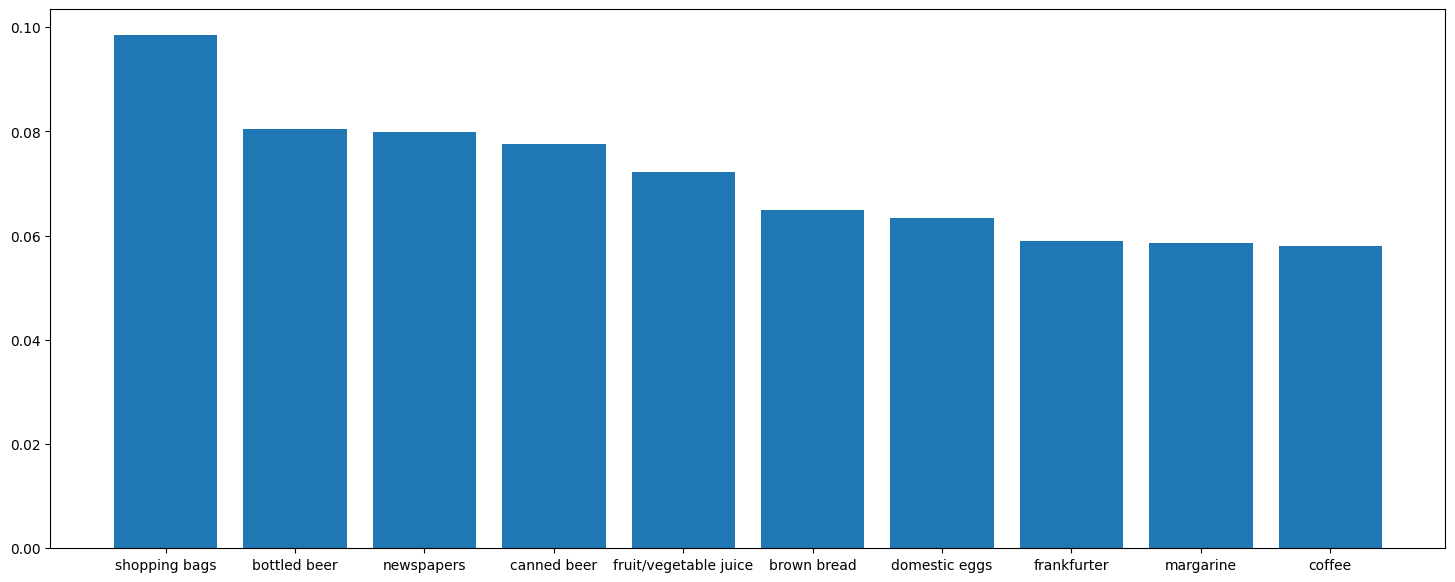

'Данная гистограмма показывает 10 наиболее часто встречаемых товаров'

In [125]:
import matplotlib.pyplot as plt

result_fpmax_len1 = fpmax(data, min_support=0.03, use_colnames=True, max_len=1)
items = []
supports = []

for item in result_fpmax_len1["itemsets"]:
    items.append(*list(item))

for support in result_fpmax_len1["support"]:
    supports.append(support)

dictionary_most_common = {}
for i in range(len(items)):
    dictionary_most_common[items[i]] = supports[i]

tuple_most_common = tuple(sorted(dictionary_most_common.items(), key=lambda x: x[1], reverse=True))[0:10]

fig, ax = plt.subplots(figsize=(18, 7))
names = [name[0] for name in tuple_most_common]
sups = [sup[1] for sup in tuple_most_common]
ax.bar(names, sups)
plt.show()

'Данная гистограмма показывает 10 наиболее часто встречаемых товаров'

In [126]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags',
         'sausage', 'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
         'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str) and elem in
            items] for row in np_data]

In [128]:
te1 = TransactionEncoder()
te_ary1 = te1.fit(np_data).transform(np_data)
data1 = pd.DataFrame(te_ary1, columns=te1.columns_)

In [132]:
result1 = fpgrowth(data1, min_support=0.03, use_colnames=True)
print(result1)

     support                             itemsets
0   0.082766                       (citrus fruit)
1   0.139502                             (yogurt)
2   0.104931                     (tropical fruit)
3   0.255516                         (whole milk)
4   0.193493                   (other vegetables)
5   0.183935                         (rolls/buns)
6   0.080529                       (bottled beer)
7   0.110524                      (bottled water)
8   0.174377                               (soda)
9   0.088968                             (pastry)
10  0.108998                    (root vegetables)
11  0.077682                        (canned beer)
12  0.093950                            (sausage)
13  0.098526                      (shopping bags)
14  0.071683                 (whipped/sour cream)
15  0.057651                               (pork)
16  0.030503           (whole milk, citrus fruit)
17  0.056024                 (yogurt, whole milk)
18  0.034367                 (rolls/buns, yogurt)


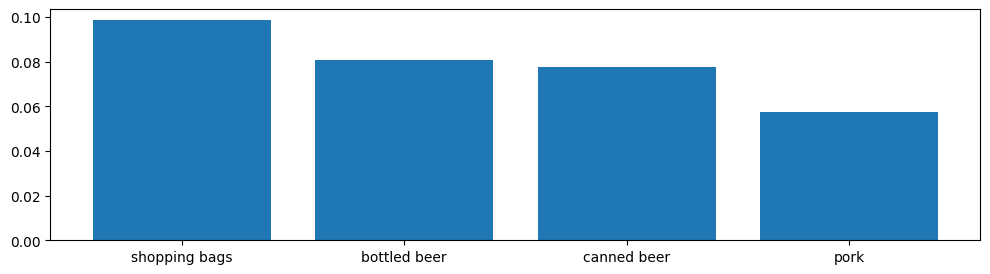

In [138]:
result2 = fpmax(data1, min_support=0.03, use_colnames=True, max_len=1)
items = []
supports = []

for item in result2["itemsets"]:
    items.append(*list(item))

for support in result2["support"]:
    supports.append(support)

dictionary_most_common = {}
for i in range(len(items)):
    dictionary_most_common[items[i]] = supports[i]

tuple_most_common = tuple(sorted(dictionary_most_common.items(), key=lambda x: x[1], reverse=True))[0:10]

fig, ax = plt.subplots(figsize=(12, 3))
names = [name[0] for name in tuple_most_common]
sups = [sup[1] for sup in tuple_most_common]
ax.bar(names, sups)
plt.show()

In [ ]:
'изменилось общее количество наборов'

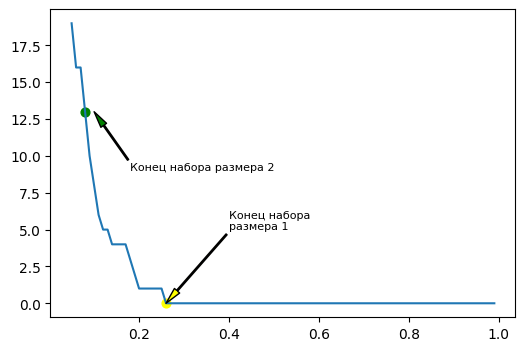

Уровень поддержки при котором перестают генерироваться наборы размера 2: 0.08000000000000000340005801292
Уровень поддержки при котором перестают генерироваться наборы размера 1: 0.2600000000000000071470607208


In [152]:
from decimal import Decimal

import matplotlib.pyplot as plt

start = Decimal(0.05)
support = []
length = []
max_len = []
while start <= 1:
    support.append(start)

    results = fpgrowth(data1, min_support=start, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))

    length.append(len(results))
    if len(results) > 0:
        max_len.append(max(results['length']))

    start += Decimal(0.01)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(support, length)

ax.scatter(support[max_len.index(1)], length[max_len.index(1)], color='green', s=40, marker='o')
ax.annotate('Конец набора размера 2', xy=(support[max_len.index(1)] + Decimal(0.02), length[max_len.index(1)]),
            xytext=(0.18, 9),
            fontsize=8, arrowprops=dict(facecolor='green', width=1, headwidth=5))

ax.scatter(support[len(max_len)], length[len(max_len)], color='yellow', s=40, marker='o')
ax.annotate('Конец набора\nразмера 1', xy=(support[len(max_len)], length[len(max_len)]), xytext=(0.4, 5),
            fontsize=8, arrowprops=dict(facecolor='yellow', width=1, headwidth=5))

plt.show()

print(f'Уровень поддержки при котором перестают генерироваться наборы размера 2: {support[max_len.index(1)]}')
print(f'Уровень поддержки при котором перестают генерироваться наборы размера 1: {support[len(max_len)]}')

In [153]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str) and elem in
            items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

In [154]:
result = fpgrowth(data, min_support=0.05, use_colnames=True)

In [165]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


In [164]:
print('''
Поддерживаемые в настоящее время метрики для оценки правил связывания и установки порогов выбора перечислены ниже. Учитывая правило «A -> C», A обозначает antecedents, а C обозначает consequents \n
Метрика support определяется для наборов элементов, а не для правил ассоциации. Таблица, созданная алгоритмом анализа правил ассоциации, содержит три различных показателя поддержки: «antecedent support», «consequent support» и «support». Здесь «antecedent support» вычисляет долю транзакций, содержащих антецедент A, и «consequent support» вычисляет поддержку набора элементов последовательного C. Метрика «support» затем вычисляет поддержку комбинированного набора элементов A ∪ C. \n
Confidence правила A-> C — это вероятность увидеть следствие в транзакции при условии, что оно также содержит антецедент. \n
Метрика lift обычно используется для измерения того, насколько чаще антецедент и консеквент правила A->C встречаются вместе, чем можно было бы ожидать, если бы они были статистически независимыми. Если А и С независимы, оценка Лифта будет ровно 1. \n
Leverage вычисляет разницу между наблюдаемой частотой появления А и С вместе и частотой, которую можно было бы ожидать, если бы А и С были независимыми. Значение кредитного плеча, равное 0, указывает на независимость. \n
Высокое значение conviction означает, что следствие сильно зависит от антецедента.
''')


Поддерживаемые в настоящее время метрики для оценки правил связывания и установки порогов выбора перечислены ниже. Учитывая правило «A -> C», A обозначает antecedents, а C обозначает consequents 

Метрика support определяется для наборов элементов, а не для правил ассоциации. Таблица, созданная алгоритмом анализа правил ассоциации, содержит три различных показателя поддержки: «antecedent support», «consequent support» и «support». Здесь «antecedent support» вычисляет долю транзакций, содержащих антецедент A, и «consequent suppor» вычисляет поддержку набора элементов последовательного C. Метрика «support» затем вычисляет поддержку комбинированного набора элементов A ∪ C. 

Confidence правила A-> C — это вероятность увидеть следствие в транзакции при условии, что оно также содержит антецедент. 

Метрика lift обычно используется для измерения того, насколько чаще антецедент и консеквент правила A->C встречаются вместе, чем можно было бы ожидать, если бы они были статистически независимым

In [166]:
'Расчет производится на основе метрике confidence'

'Расчет производится на основе метрике confidence'

In [192]:
from statistics import mean, median

import numpy as np

result = fpgrowth(data, min_support=0.04, use_colnames=True)
rules = association_rules(result, min_threshold=0.1, metric='confidence')

print(f'Среднее значение параметра confidence: {mean(rules["confidence"])}')
print(f'Медиана параметра confidence: {median(rules["confidence"])}')
print(f'СКО параметра confidence: {np.std(rules["confidence"])}')
rules

Среднее значение параметра confidence: 0.2829052726691693
Медиана параметра confidence: 0.23824809507666894
СКО параметра confidence: 0.09174103324706069


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
2,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
3,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
4,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
5,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
6,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
8,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
9,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477


In [193]:
rules = association_rules(result, min_threshold=0.01, metric='support')

print(f'Среднее значение параметра support: {mean(rules["support"])}')
print(f'Медиана параметра support: {median(rules["support"])}')
print(f'СКО параметра support: {np.std(rules["support"])}')

rules

Среднее значение параметра support: 0.050240072304129246
Медиана параметра support: 0.047381799694966954
СКО параметра support: 0.010332111871899625


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
2,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
3,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
4,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
5,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
6,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
8,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
9,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477


In [194]:
rules = association_rules(result, min_threshold=0.01, metric='leverage')

print(f'Среднее значение параметра leverage: {mean(rules["leverage"])}')
print(f'Медиана параметра leverage: {median(rules["leverage"])}')
print(f'СКО параметра leverage: {np.std(rules["leverage"])}')

rules

Среднее значение параметра leverage: 0.020838559154364243
Медиана параметра leverage: 0.02071778653838151
СКО параметра leverage: 0.004059627576864452


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
2,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
3,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
4,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
5,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
6,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
8,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
9,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941


In [195]:
rules = association_rules(result, min_threshold=0.01, metric='conviction')

print(f'Среднее значение параметра conviction: {mean(rules["conviction"])}')
print(f'Медиана параметра conviction: {median(rules["conviction"])}')
print(f'СКО параметра conviction: {np.std(rules["conviction"])}')

rules

Среднее значение параметра conviction: 1.140331125249048
Медиана параметра conviction: 1.1057966943491302
СКО параметра conviction: 0.11799021582624744


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
2,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
3,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
4,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
5,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
6,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
7,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
8,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
9,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477


In [277]:
rules = association_rules(result, min_threshold=0.4, metric='confidence')

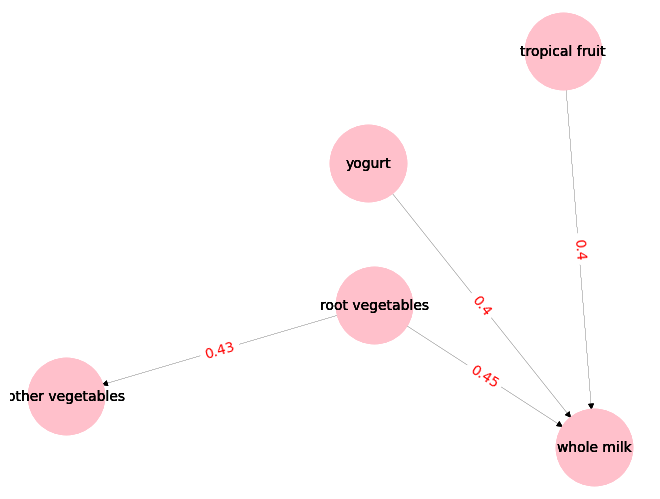

In [382]:
import networkx as nx

antecedents = rules["antecedents"]
consequents = rules["consequents"]
confidence = rules["confidence"]
supports = rules["support"]

edges = []
dict_labels = {}

for i in range(len(antecedents)):
    edges.append([str(list(antecedents[i])[0]), str(list(consequents[i])[0])])
    dict_labels[(str(list(antecedents[i])[0]), str(list(consequents[i])[0]))] = round(confidence[i], 2)

G = nx.DiGraph()
for i in edges:
    G.add_nodes_from(i)
    G.add_edges_from([tuple(i)])

pos = nx.spring_layout(G)
plt.figure()
for i in range(len(dict_labels.items())):
    nx.draw(
        G, pos, edge_color='black', width=round(supports[i], 2), linewidths=1,
        node_size=3000, node_color='pink', alpha=0.9, font_size=10,
        labels={node: node for node in G.nodes()})

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=dict_labels,
    font_color='red'
)

plt.axis('off')
plt.show()


In [385]:
'Из полученного графа можно четко увидеть связи между антецедентами и консеквентами и уровень поддержки между ними.'

'Из полученного графа можно четко увидеть связи между антецедентами и консеквентами и уровень поддержки между ними.'

In [386]:
'Дополнительно данные можно было визуализировать с помощью Yellowbricks.'

'Дополнительно данные можно было визуализировать с помощью Yellowbricks.'